<a href="https://colab.research.google.com/github/BennettLovejoy/BennettLovejoy/blob/main/Columbus_City_School_Demographics_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from functools import reduce

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
CCSD_Schools = pd.read_excel('/content/drive/MyDrive/Columbus City Schools/Take 2/NCES Dataset/CCSD Data Cleaned .xlsx')

In [25]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import numpy as np

In [26]:
Neighborhood_Poverty = pd.read_excel('/content/drive/MyDrive/Columbus City Schools/Take 2/NCES Dataset/Neighborhood Poverty Data Cleaned .xlsx')

In [27]:
from shapely.geometry import Point
city_boundary = gpd.read_file('/content/drive/MyDrive/Columbus City Schools/Take 2/Corporate_Boundary.geojson')

In [28]:
schools_gdf = gpd.GeoDataFrame(
    CCSD_Schools,
    geometry=gpd.points_from_xy(CCSD_Schools['Longitude [Public School] 2022-23'], CCSD_Schools['Latitude [Public School] 2022-23'])
)

In [29]:
schools_gdf.set_crs(city_boundary.crs, inplace=True)

,School Name,School Name [Public School] 2022-23,School ID - NCES Assigned [Public School] Latest available year,Agency Name [Public School] 2022-23,Agency ID - NCES Assigned [Public School] Latest available year,County Name [Public School] 2022-23,County Number [Public School] 2022-23,ANSI/FIPS State Code [Public School] Latest available year,Location Address 1 [Public School] 2022-23,School Type [Public School] 2022-23,...,Asian or Asian/Pacific Islander Students [Public School] 2022-23,Hispanic Students [Public School] 2022-23,Black or African American Students [Public School] 2022-23,White Students [Public School] 2022-23,Nat. Hawaiian or Other Pacific Isl. Students [Public School] 2022-23,Two or More Races Students [Public School] 2022-23,Total Race/Ethnicity [Public School] 2022-23,Full-Time Equivalent (FTE) Teachers [Public School] 2022-23,Pupil/Teacher Ratio [Public School] 2022-23,geometry
0,ALPINE ELEMENTARY SCHOOL,Alpine Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,1590 Alpine Dr,1-Regular school,...,9.0,28.0,179.0,60.0,2.0,29.0,307.0,17.0,18.06,POINT (-82.97400 40.09440)
1,ARTS IMPACT MIDDLE SCHOOL (AIMS),Arts Impact Middle School (Aims),3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,680 Jack Gibbs Blvd,1-Regular school,...,1.0,49.0,376.0,55.0,0.0,51.0,532.0,33.0,16.12,POINT (-83.00790 39.98580)
2,AVALON ELEMENTARY SCHOOL,Avalon Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,5220 Avalon Ave,1-Regular school,...,28.0,92.0,208.0,26.0,0.0,20.0,375.0,20.0,18.75,POINT (-82.95530 40.07610)
3,AVONDALE ELEMENTARY SCHOOL,Avondale Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,141 Hawkes Ave,1-Regular school,...,3.0,22.0,85.0,98.0,0.0,32.0,240.0,16.0,15,POINT (-83.02580 39.95630)
4,BEATTY PARK ELEMENTARY SCHOOL,Beatty Park Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,519 Trevitt St,2-Special education school,...,0.0,4.0,30.0,8.0,0.0,5.0,47.0,10.0,4.7,POINT (-82.97150 39.97641)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,"Data Source: U.S. Department of Education, Nat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
122,† indicates that the data are not applicable.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
123,– indicates that the data are missing.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY


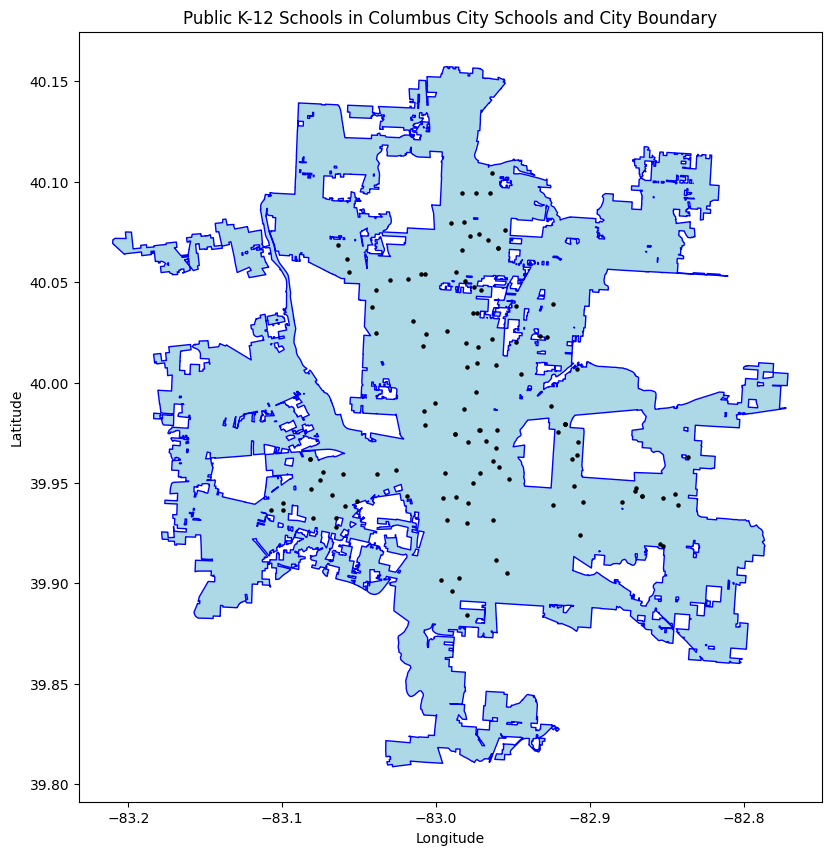

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
city_boundary.plot(ax=ax, color='lightblue', edgecolor='blue')
schools_gdf.plot(ax=ax, color='black', markersize=5)

plt.title('Public K-12 Schools in Columbus City Schools and City Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

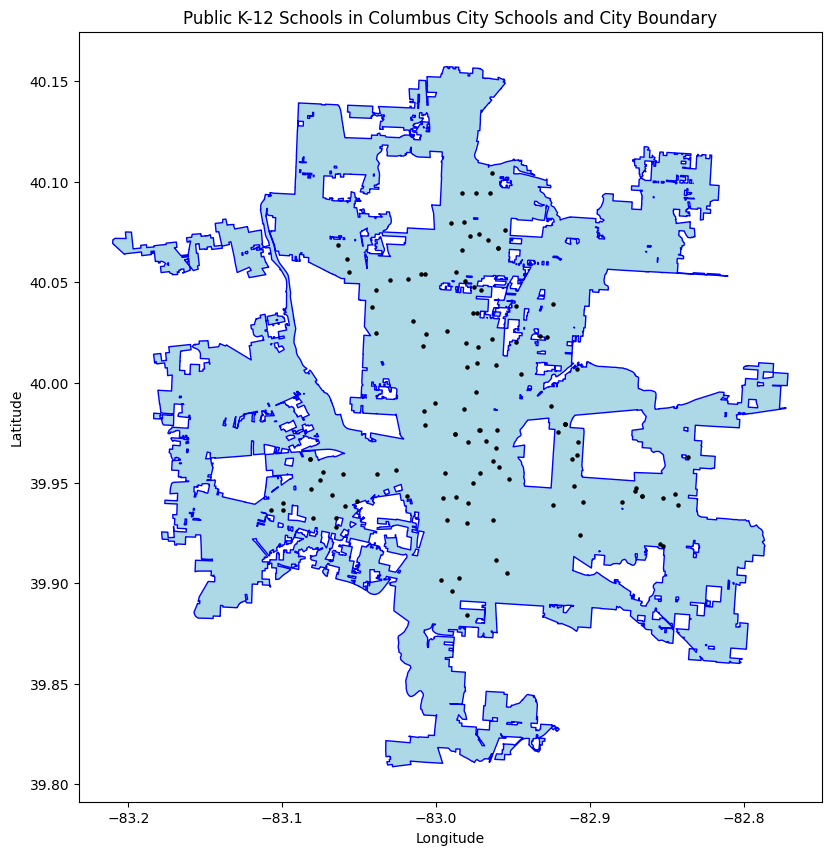

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
city_boundary.plot(ax=ax, color='lightblue', edgecolor='blue')
schools_gdf.plot(ax=ax, color='black', markersize=5)

plt.title('Public K-12 Schools in Columbus City Schools and City Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## 06-20-2024

In [32]:
CCSD_Schools.head()

,School Name,School Name [Public School] 2022-23,School ID - NCES Assigned [Public School] Latest available year,Agency Name [Public School] 2022-23,Agency ID - NCES Assigned [Public School] Latest available year,County Name [Public School] 2022-23,County Number [Public School] 2022-23,ANSI/FIPS State Code [Public School] Latest available year,Location Address 1 [Public School] 2022-23,School Type [Public School] 2022-23,...,American Indian/Alaska Native Students [Public School] 2022-23,Asian or Asian/Pacific Islander Students [Public School] 2022-23,Hispanic Students [Public School] 2022-23,Black or African American Students [Public School] 2022-23,White Students [Public School] 2022-23,Nat. Hawaiian or Other Pacific Isl. Students [Public School] 2022-23,Two or More Races Students [Public School] 2022-23,Total Race/Ethnicity [Public School] 2022-23,Full-Time Equivalent (FTE) Teachers [Public School] 2022-23,Pupil/Teacher Ratio [Public School] 2022-23
0,ALPINE ELEMENTARY SCHOOL,Alpine Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,1590 Alpine Dr,1-Regular school,...,0.0,9.0,28.0,179.0,60.0,2.0,29.0,307.0,17.0,18.06
1,ARTS IMPACT MIDDLE SCHOOL (AIMS),Arts Impact Middle School (Aims),3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,680 Jack Gibbs Blvd,1-Regular school,...,0.0,1.0,49.0,376.0,55.0,0.0,51.0,532.0,33.0,16.12
2,AVALON ELEMENTARY SCHOOL,Avalon Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,5220 Avalon Ave,1-Regular school,...,1.0,28.0,92.0,208.0,26.0,0.0,20.0,375.0,20.0,18.75
3,AVONDALE ELEMENTARY SCHOOL,Avondale Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,141 Hawkes Ave,1-Regular school,...,0.0,3.0,22.0,85.0,98.0,0.0,32.0,240.0,16.0,15
4,BEATTY PARK ELEMENTARY SCHOOL,Beatty Park Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,519 Trevitt St,2-Special education school,...,0.0,0.0,4.0,30.0,8.0,0.0,5.0,47.0,10.0,4.7


## 06-21-24

In [33]:
CCSD_Schools.head()

,School Name,School Name [Public School] 2022-23,School ID - NCES Assigned [Public School] Latest available year,Agency Name [Public School] 2022-23,Agency ID - NCES Assigned [Public School] Latest available year,County Name [Public School] 2022-23,County Number [Public School] 2022-23,ANSI/FIPS State Code [Public School] Latest available year,Location Address 1 [Public School] 2022-23,School Type [Public School] 2022-23,...,American Indian/Alaska Native Students [Public School] 2022-23,Asian or Asian/Pacific Islander Students [Public School] 2022-23,Hispanic Students [Public School] 2022-23,Black or African American Students [Public School] 2022-23,White Students [Public School] 2022-23,Nat. Hawaiian or Other Pacific Isl. Students [Public School] 2022-23,Two or More Races Students [Public School] 2022-23,Total Race/Ethnicity [Public School] 2022-23,Full-Time Equivalent (FTE) Teachers [Public School] 2022-23,Pupil/Teacher Ratio [Public School] 2022-23
0,ALPINE ELEMENTARY SCHOOL,Alpine Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,1590 Alpine Dr,1-Regular school,...,0.0,9.0,28.0,179.0,60.0,2.0,29.0,307.0,17.0,18.06
1,ARTS IMPACT MIDDLE SCHOOL (AIMS),Arts Impact Middle School (Aims),3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,680 Jack Gibbs Blvd,1-Regular school,...,0.0,1.0,49.0,376.0,55.0,0.0,51.0,532.0,33.0,16.12
2,AVALON ELEMENTARY SCHOOL,Avalon Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,5220 Avalon Ave,1-Regular school,...,1.0,28.0,92.0,208.0,26.0,0.0,20.0,375.0,20.0,18.75
3,AVONDALE ELEMENTARY SCHOOL,Avondale Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,141 Hawkes Ave,1-Regular school,...,0.0,3.0,22.0,85.0,98.0,0.0,32.0,240.0,16.0,15
4,BEATTY PARK ELEMENTARY SCHOOL,Beatty Park Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,519 Trevitt St,2-Special education school,...,0.0,0.0,4.0,30.0,8.0,0.0,5.0,47.0,10.0,4.7


In [34]:
import pandas as pd

# Display the first few rows
print(CCSD_Schools.head())

# Summary statistics
print(CCSD_Schools.describe())

# Info about data types and non-null values
print(CCSD_Schools.info())

                        School Name School Name [Public School] 2022-23  \
0          ALPINE ELEMENTARY SCHOOL            Alpine Elementary School   
1  ARTS IMPACT MIDDLE SCHOOL (AIMS)    Arts Impact Middle School (Aims)   
2          AVALON ELEMENTARY SCHOOL            Avalon Elementary School   
3        AVONDALE ELEMENTARY SCHOOL          Avondale Elementary School   
4     BEATTY PARK ELEMENTARY SCHOOL       Beatty Park Elementary School   

   School ID - NCES Assigned [Public School] Latest available year  \
0                                       3.904380e+11                 
1                                       3.904380e+11                 
2                                       3.904380e+11                 
3                                       3.904380e+11                 
4                                       3.904380e+11                 

  Agency Name [Public School] 2022-23  \
0      Columbus City Schools District   
1      Columbus City Schools District   
2    

In [35]:
num_cols = CCSD_Schools.select_dtypes(include=['number']).columns
num_numeric_cols = len(num_cols)
print(num_numeric_cols)

17


In [36]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

In [37]:
num_cols = CCSD_Schools.select_dtypes(include=['number']).columns.tolist()
if num_numeric_cols == 1:
    axes = [axes]

In [38]:
num_cols2 = num_cols[6:17]
num_cols2

['Congressional Code [Public School] 2022-23',
 'Total Students, All Grades (Includes AE) [Public School] 2022-23',
 'American Indian/Alaska Native Students [Public School] 2022-23',
 'Asian or Asian/Pacific Islander Students [Public School] 2022-23',
 'Hispanic Students [Public School] 2022-23',
 'Black or African American Students [Public School] 2022-23',
 'White Students [Public School] 2022-23',
 'Nat. Hawaiian or Other Pacific Isl. Students [Public School] 2022-23',
 'Two or More Races Students [Public School] 2022-23',
 'Total Race/Ethnicity [Public School] 2022-23',
 'Full-Time Equivalent (FTE) Teachers [Public School] 2022-23']

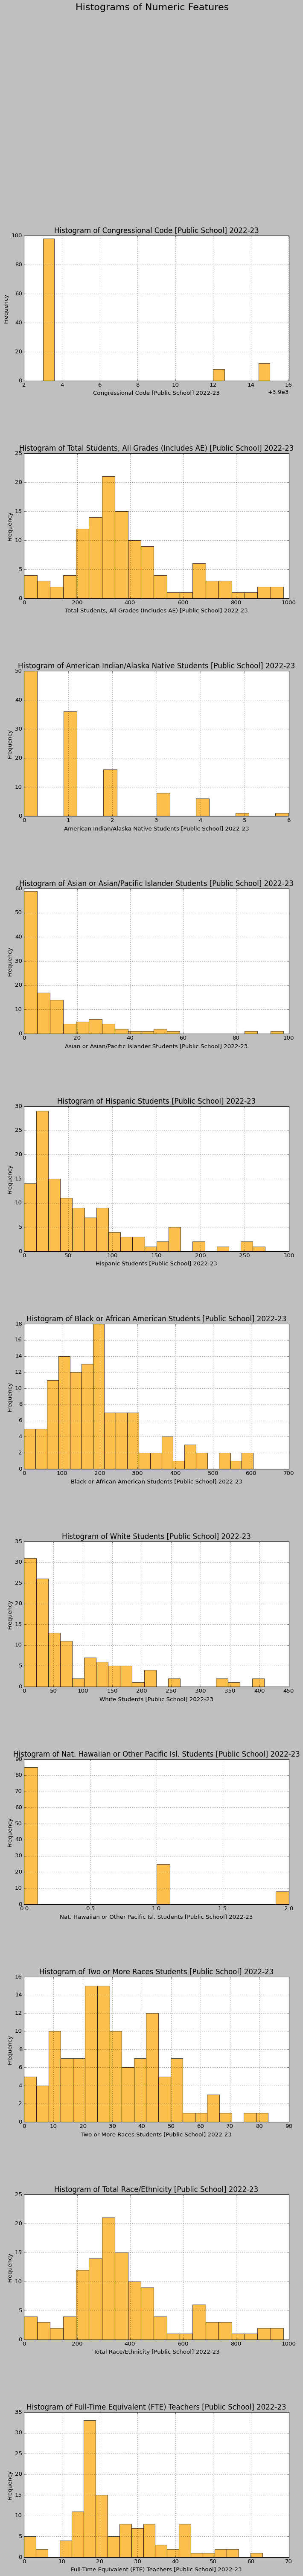

In [39]:
fig, axes = plt.subplots(nrows=len(num_cols2), ncols=1, figsize=(10, 5*num_numeric_cols))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

for i, col in enumerate(num_cols2):
    axes[i].hist(CCSD_Schools[col].dropna(), bins=20, color='orange', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histogram of {col}', fontsize=15)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True)

# Set a main title for all subplots
fig.suptitle('Histograms of Numeric Features', fontsize=20)
plt.draw()
plt.show()

## Demographic Exploratory Data Analysis

In [40]:
school_poverty = pd.read_excel('/content/drive/MyDrive/Columbus City Schools/Take 2/NCES Dataset/Neighborhood Poverty Data Cleaned .xlsx')

In [41]:
CCSD_Schools.rename(columns={"School ID - NCES Assigned [Public School] Latest available year": "NCESSCH"}, inplace=True)

In [52]:
school_poverty['NCESSCH'] = school_poverty['NCESSCH'].astype(float)
CCSD_Schools['NCESSCH'] = CCSD_Schools['NCESSCH'].astype(float)

In [54]:
import pandas as pd

# Load your data (example file paths)
print("School Poverty Data:")
print(school_poverty.head())

print("\nCCSD Schools Data:")
print(CCSD_Schools.head())

# Perform the join
merged = pd.merge(school_poverty, CCSD_Schools, on='NCESSCH', how='inner')

# Display the first few rows of the joined dataframe
print("\nJoined Data:")
print(joined.head())

# Display column names
print("\nColumns in Joined Data:")
print(joined.columns)

# Display summary information of the dataframe
print("\nInformation about Joined Data:")
print(joined.info())

# Check for missing values
print("\nMissing Values in Joined Data:")
print(joined.isnull().sum())


School Poverty Data:
        NCESSCH                               NAME  IPR_EST  IPR_SE
0  1.000050e+10          Albertville Middle School      259    87.0
1  1.000050e+10            Albertville High School      261    92.0
2  1.000050e+10    Albertville Intermediate School      139    61.0
3  1.000050e+10      Albertville Elementary School      227   110.0
4  1.000050e+10  Albertville Kindergarten and PreK      373   124.0

CCSD Schools Data:
                        School Name School Name [Public School] 2022-23  \
0          ALPINE ELEMENTARY SCHOOL            Alpine Elementary School   
1  ARTS IMPACT MIDDLE SCHOOL (AIMS)    Arts Impact Middle School (Aims)   
2          AVALON ELEMENTARY SCHOOL            Avalon Elementary School   
3        AVONDALE ELEMENTARY SCHOOL          Avondale Elementary School   
4     BEATTY PARK ELEMENTARY SCHOOL       Beatty Park Elementary School   

        NCESSCH Agency Name [Public School] 2022-23  \
0  3.904380e+11      Columbus City Schools Di

In [56]:
# Function to remove duplicate columns based on their content
def remove_duplicate_columns(df):
    seen_columns = {}
    keep_columns = []

    for col in df.columns:
        col_data = tuple(df[col])
        if col_data not in seen_columns:
            seen_columns[col_data] = col
            keep_columns.append(col)

    return df[keep_columns]

# Remove duplicate columns
cleaned_df = remove_duplicate_columns(merged)

# Drop rows with any missing values
final_df = cleaned_df.dropna()

# Display the first few rows of the final dataframe
print(final_df.head())
print(final_df.info())

        NCESSCH                                   NAME  IPR_EST  IPR_SE  \
0  3.904380e+11               Fort Hayes Career Center      157   113.0   
1  3.904380e+11  Columbus Spanish Immersion K-7 School      144    54.0   
2  3.904380e+11           Valleyview Elementary School      192    66.0   
3  3.904380e+11               Alpine Elementary School      262    64.0   
4  3.904380e+11               Avalon Elementary School      258    57.0   

                             School Name  \
0               FORT HAYES CAREER CENTER   
1  COLUMBUS SPANISH IMMERSION K-7 SCHOOL   
2           VALLEYVIEW ELEMENTARY SCHOOL   
3               ALPINE ELEMENTARY SCHOOL   
4               AVALON ELEMENTARY SCHOOL   

     School Name [Public School] 2022-23 Agency Name [Public School] 2022-23  \
0               Fort Hayes Career Center      Columbus City Schools District   
1  Columbus Spanish Immersion K-7 School      Columbus City Schools District   
2           Valleyview Elementary School    